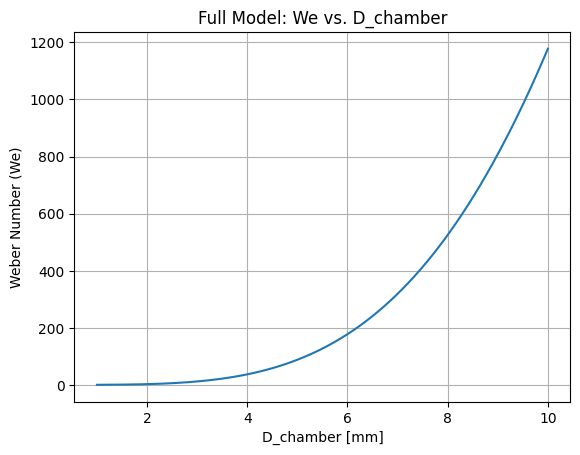

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# ✅ 1. 상수 정의 (필요시 조정 가능)
k2 = 2800              # N/m
m = 0.05            # kg
rho = 1000          # kg/m^3
v_piston = 3        # m/s  ← 이 값은 실제 측정 필요
g = 9.81            # m/s^2
sigma = 0.0728      # N/m

# ⬇️ mm 단위 기반 정의
L_chamber = 0.5 * 1e-3       # m
x = 10.0 * 1e-3               # m (stroke length)
v = 2                     # m/s
D1 = 1.0 * 1e-3              # m
D2 = 0.2 * 1e-3              # m
L1 = 20.0 * 1e-3             # m
L2 = 5.0 * 1e-3             # m
K = 0.9                     # 충돌 수두손실
f_pipe = 0.03               # 유체 점성 수두손실
A_in = (np.pi/4)*D1**2                  # m^2

k1 = 1400                       # N/m
L_open = 1.0 * 1e-3          # m
f_gap = 0.3
E = 1e9                      # Pa
delta_gap = 0.001 * 1e-3       # m
h_packing = 1 * 1e-3      # m
t = 0.1                      # sec


# ✅ 2. D_chamber 정의
D_chamber = np.linspace(0.001, 0.01, 300)  # [m]

# ✅ 3. 구성 항 계산

# (1) A_chamber
A_chamber = (np.pi / 4) * D_chamber**2

# (2) 기하학 항 A
geom_term = np.sqrt((1 - f_pipe * L1 / D1) * (1 - K) * (1 - f_pipe * L2 / D2))
A_term = ((rho * D2 / sigma) * ((A_chamber / A_in) * geom_term))**2

# (3) 마찰력
F_friction = 2 * np.pi * f_gap * E * delta_gap * h_packing  # 상수

# (4) F_mu.f
A_wall = np.pi * D_chamber * x
F_muf = A_wall * (f_pipe * (L_chamber / D_chamber) * (1 / (2 * g)) * v_piston**2)

# (5) F_open
F_open = k1 * L_open  # 상수

# (6) F_total = F_finger - F_friction - F_muf - F_open
F_finger = 20.0  # N (임의값 또는 상수로 둘 수 있음)
F_total = F_finger - F_friction - F_muf - F_open
B_term = (F_total)**2

# (7) 감쇠 관련 항

zeta = c / (2 * np.sqrt(m * k2))
omega_n = np.sqrt(k2 / m)
omega_d = omega_n * np.sqrt(1 - zeta**2)

# (8) 진동 응답 항
exp_term = np.exp(-zeta * omega_n * t)
dyn_term = (
    zeta * omega_n * (np.cos(omega_d * t) + (zeta * omega_n / omega_d) * np.sin(omega_d * t))
    - omega_d * (-np.sin(omega_d * t) + (zeta * omega_n / omega_d) * np.cos(omega_d * t))
)
C_term = ((exp_term / k)**2) * (dyn_term**2)

# ✅ 4. 최종 We 수
We = A_term * B_term * C_term

# ✅ 5. 그래프 출력
plt.plot(D_chamber * 1000, We)
plt.xlabel('D_chamber [mm]')
plt.ylabel('Weber Number (We)')
plt.title('Full Model: We vs. D_chamber')
plt.grid(True)
plt.show()
